In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import h5py

In [2]:
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
class ANN_cat_classification_model(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        
        self.dropout_L1 = tf.keras.layers.Dropout(0.3)
        self.L1 = tf.keras.layers.Dense(units=10, activation='relu')
        
        self.dropout_L2 = tf.keras.layers.Dropout(0.3)
        self.L2 = tf.keras.layers.Dense(units=7, activation='relu')
        
        self.dropout_L3 = tf.keras.layers.Dropout(0.3)
        self.L3 = tf.keras.layers.Dense(units=5, activation='relu')
        
        self.L4 = tf.keras.layers.Dense(units=1, activation='sigmoid')
    
    def call(self, inputs, training=False):
        
        self.x = self.L1(inputs)
        if training:
            self.x = self.dropout_L1(self.x, training=training)
        
        self.x = self.L2(self.x)
        if training:
            self.x = self.dropout_L2(self.x, training=training)
        
        self.x = self.L3(self.x)
        if training:
            self.x = self.dropout_L3(self.x, training=training)
        
        self.x = self.L4(self.x)
        
        return self.x

In [4]:
train_data = h5py.File('dataset/ANN_cc_train.h5', mode='r')
test_data  = h5py.File('dataset/ANN_cc_test.h5', mode='r')

x_train = np.array(train_data['train_set_x'][:], dtype='float')
y_train = np.array(train_data['train_set_y'][:], dtype='float')

x_test = np.array(test_data['test_set_x'][:], dtype='float')
y_test = np.array(test_data['test_set_y'][:], dtype='float')

In [5]:
x_f = x_train.reshape(x_train.shape[0], -1)
y_f = y_train.reshape(x_train.shape[0], -1)

xt_f = x_test.reshape(x_test.shape[0], -1)
yt_f = y_test.reshape(x_test.shape[0], -1)

In [6]:
mu, std = x_f.mean(axis=0), x_f.std(axis=0)

x_f = (x_f - mu) / std
xt_f = (xt_f - mu) / std

In [7]:
model = ANN_cat_classification_model()

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
hist = model.fit(x_f, y_f, epochs=200, verbose=0)

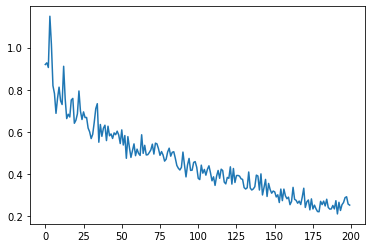

In [10]:
plt.plot(hist.history['loss'])
plt.show()

In [11]:
print('Accuracy:', model.evaluate(x=xt_f, y=yt_f, verbose=0)[1])

Accuracy: 0.7


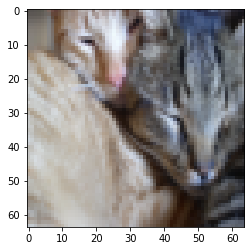

Predicted: Cat


In [12]:
r = np.random.randint(0, x_test.shape[0])

plt.imshow(x_test[r] / 255)
plt.show()

predicted = model.predict(xt_f[r].reshape(1, 12288))

if predicted > 0.5:
    print('Predicted:', 'Cat')
else:
    print('Predicted:', 'Not Cat')